In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import pandas as pd
train=pd.read_csv("bigdatamart_Train.csv")
test=pd.read_csv("bigdatamart_Test.csv")
train["source"]="train"
test["source"]="test"
data=pd.concat([train,test],ignore_index=True)
data

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,train
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14199,FDB58,10.50,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1,NaN,test
14200,FDD47,7.60,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2,NaN,test
14201,NCO17,10.00,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1,NaN,test
14202,FDJ26,15.30,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1,NaN,test


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                11765 non-null  float64
 2   Item_Fat_Content           14204 non-null  object 
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  object 
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  object 
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                10188 non-null  object 
 9   Outlet_Location_Type       14204 non-null  object 
 10  Outlet_Type                14204 non-null  object 
 11  Item_Outlet_Sales          8523 non-null   float64
 12  source                     14204 non-null  object 
dtypes: float64(4), int64(1), object(8)
memory usag

In [4]:
data.isnull().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
source                          0
dtype: int64

In [5]:
train.shape, test.shape, data.shape

((8523, 13), (5681, 12), (14204, 13))

In [6]:
train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales', 'source'],
      dtype='object')

In [7]:
test.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'source'],
      dtype='object')

In [8]:
data.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales', 'source'],
      dtype='object')

In [9]:
test['Item_Outlet_Sales'] = 0
test.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'source', 'Item_Outlet_Sales'],
      dtype='object')

In [10]:
test.shape

(5681, 13)

In [11]:

data1 = pd.concat([train, test], sort = False)
data1

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,train
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.50,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1,0.0000,test
5677,FDD47,7.60,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2,0.0000,test
5678,NCO17,10.00,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1,0.0000,test
5679,FDJ26,15.30,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1,0.0000,test


In [12]:
data1.Item_Outlet_Sales

0       3735.1380
1        443.4228
2       2097.2700
3        732.3800
4        994.7052
          ...    
5676       0.0000
5677       0.0000
5678       0.0000
5679       0.0000
5680       0.0000
Name: Item_Outlet_Sales, Length: 14204, dtype: float64

In [13]:
data.Item_Outlet_Sales

0        3735.1380
1         443.4228
2        2097.2700
3         732.3800
4         994.7052
           ...    
14199          NaN
14200          NaN
14201          NaN
14202          NaN
14203          NaN
Name: Item_Outlet_Sales, Length: 14204, dtype: float64

In [14]:
data=data1

In [15]:
data

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,train
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.50,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1,0.0000,test
5677,FDD47,7.60,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2,0.0000,test
5678,NCO17,10.00,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1,0.0000,test
5679,FDJ26,15.30,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1,0.0000,test


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14204 entries, 0 to 5680
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                11765 non-null  float64
 2   Item_Fat_Content           14204 non-null  object 
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  object 
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  object 
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                10188 non-null  object 
 9   Outlet_Location_Type       14204 non-null  object 
 10  Outlet_Type                14204 non-null  object 
 11  Item_Outlet_Sales          14204 non-null  float64
 12  source                     14204 non-null  object 
dtypes: float64(4), int64(1), object(8)
memory usage

In [17]:
data.isnull().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
source                          0
dtype: int64

In [18]:
data['Item_Outlet_Sales'].describe()

count    14204.000000
mean      1308.865489
std       1699.791423
min          0.000000
25%          0.000000
50%        559.272000
75%       2163.184200
max      13086.964800
Name: Item_Outlet_Sales, dtype: float64

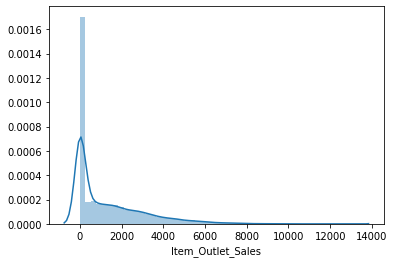

In [19]:
sns.distplot(data['Item_Outlet_Sales'])

In [20]:
print('Skewness: %f' % data['Item_Outlet_Sales'].skew())
print('Kurtsis: %f' %data['Item_Outlet_Sales'].kurt())

Skewness: 1.544684
Kurtsis: 2.419439


In [21]:
categorial_features = data.select_dtypes(include=[np.object])
categorial_features.head(2)

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,source
0,FDA15,Low Fat,Dairy,OUT049,Medium,Tier 1,Supermarket Type1,train
1,DRC01,Regular,Soft Drinks,OUT018,Medium,Tier 3,Supermarket Type2,train


In [22]:
numerical_features = data.select_dtypes(include=[np.number])
numerical_features.head(2)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
0,9.30,0.016047,249.8092,1999,3735.1380
1,5.92,0.019278,48.2692,2009,443.4228


In [23]:
data['Outlet_Establishment_Year'].value_counts()

1985    2439
1987    1553
1999    1550
1997    1550
2004    1550
2002    1548
2009    1546
2007    1543
1998     925
Name: Outlet_Establishment_Year, dtype: int64

In [24]:
data.apply(lambda x : len(x.unique()))

Item_Identifier               1559
Item_Weight                    416
Item_Fat_Content                 5
Item_Visibility              13006
Item_Type                       16
Item_MRP                      8052
Outlet_Identifier               10
Outlet_Establishment_Year        9
Outlet_Size                      4
Outlet_Location_Type             3
Outlet_Type                      4
Item_Outlet_Sales             3494
source                           2
dtype: int64

In [25]:
for col in data.columns:
    if data[col].dtype=="object":
        print("column name is: {} and number of distinct values: {}".format(col,len(data[col].value_counts())))
        print()


column name is: Item_Identifier and number of distinct values: 1559

column name is: Item_Fat_Content and number of distinct values: 5

column name is: Item_Type and number of distinct values: 16

column name is: Outlet_Identifier and number of distinct values: 10

column name is: Outlet_Size and number of distinct values: 3

column name is: Outlet_Location_Type and number of distinct values: 3

column name is: Outlet_Type and number of distinct values: 4

column name is: source and number of distinct values: 2



In [26]:
#frequency of categories
for col in data.columns:
    if data[col].dtype=="object":
        print(data[col].value_counts())
        print()

FDT25    10
FDX46    10
FDU52    10
FDE21    10
FDH48    10
         ..
FDS22     7
NCL42     7
NCW54     7
FDM52     7
FDM50     7
Name: Item_Identifier, Length: 1559, dtype: int64

Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
Name: Item_Type, dtype: int64

OUT027    1559
OUT013    1553
OUT035    1550
OUT046    1550
OUT049    1550
OUT045    1548
OUT018    1546
OUT017    1543
OUT010     925
OUT019     880
Name: Outlet_Identifier, dtype: int64


In [27]:
#replacing low fat and LF with Low Fat
#replacing reg with Regular
data["Item_Fat_Content"].replace("low fat","Low Fat",inplace=True)
data["Item_Fat_Content"].replace("LF","Low Fat",inplace=True)
data["Item_Fat_Content"].replace("reg","Regular",inplace=True)

In [28]:
data["Item_Fat_Content"].value_counts()

Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64

In [29]:
data.apply(lambda x: sum(x.isnull()))

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
source                          0
dtype: int64

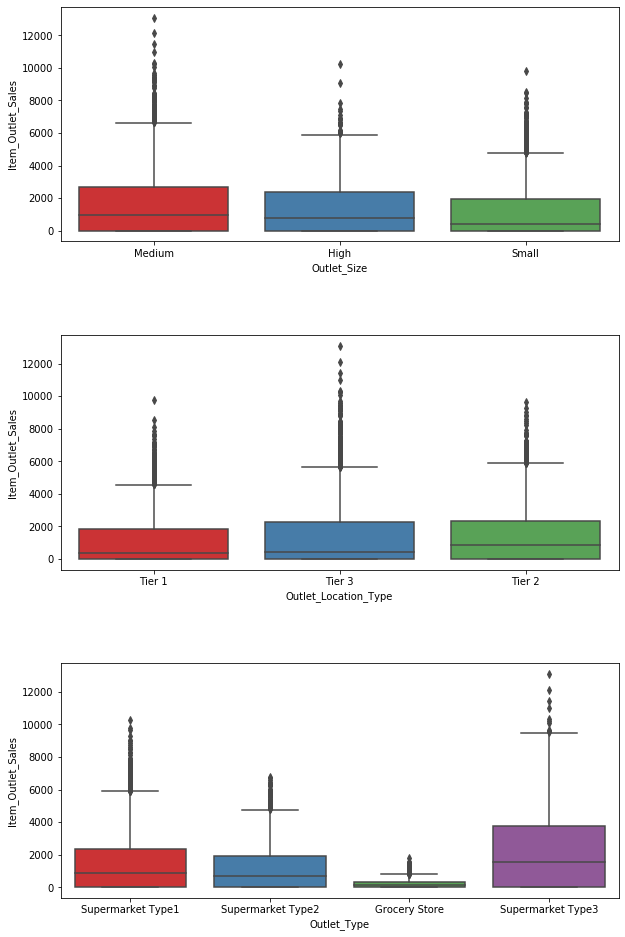

In [30]:
plt.figure(figsize = (10,9))

plt.subplot(311)
sns.boxplot(x='Outlet_Size', y='Item_Outlet_Sales', data=data, palette="Set1")

plt.subplot(312)
sns.boxplot(x='Outlet_Location_Type', y='Item_Outlet_Sales', data=data, palette="Set1")

plt.subplot(313)
sns.boxplot(x='Outlet_Type', y='Item_Outlet_Sales', data=data, palette="Set1")

plt.subplots_adjust(wspace = 0.2, hspace = 0.4,top = 1.5)

plt.show()

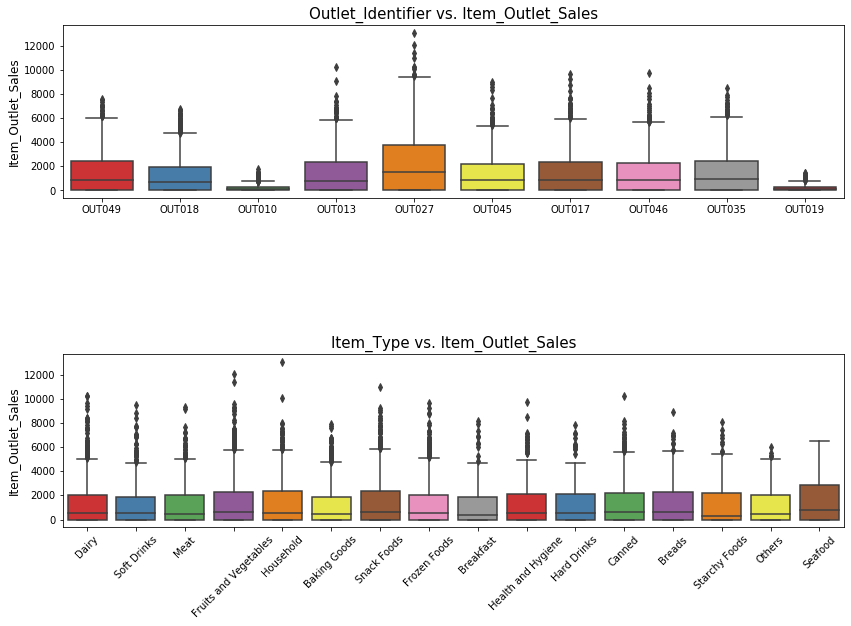

In [31]:
plt.figure(figsize = (14,9))

plt.subplot(211)
ax = sns.boxplot(x='Outlet_Identifier', y='Item_Outlet_Sales', data=data, palette="Set1")
ax.set_title("Outlet_Identifier vs. Item_Outlet_Sales", fontsize=15)
ax.set_xlabel("", fontsize=12)
ax.set_ylabel("Item_Outlet_Sales", fontsize=12)

plt.subplot(212)
ax = sns.boxplot(x='Item_Type', y='Item_Outlet_Sales', data=data, palette="Set1")
ax.set_title("Item_Type vs. Item_Outlet_Sales", fontsize=15)
ax.set_xlabel("", fontsize=12)
ax.set_ylabel("Item_Outlet_Sales", fontsize=12)

plt.subplots_adjust(hspace = 0.9, top = 0.9)
plt.setp(ax.get_xticklabels(), rotation=45)

plt.show()

Data Cleaning and Imputing Missing Values

In [32]:
item_avg_weight = data.pivot_table(values='Item_Weight', index='Item_Identifier')

missing_values = data['Item_Weight'].isnull()
print('Missing values: %d' %sum(missing_values))

data.loc[missing_values,'Item_Weight']  = data.loc[missing_values,'Item_Identifier'].apply(lambda x: item_avg_weight.at[x,'Item_Weight'])
print('Missing values after immputation %d' %sum(data['Item_Weight'].isnull()))

Missing values: 2439
Missing values after immputation 0


In [33]:
data["Outlet_Size"].value_counts()

Medium    4655
Small     3980
High      1553
Name: Outlet_Size, dtype: int64

In [34]:
#Import mode function:
from scipy.stats import mode

#Determing the mode for each
outlet_size_mode = data.pivot_table(values='Outlet_Size', columns='Outlet_Type',aggfunc=(lambda x:mode(x.astype('str')).mode[0]))
print ('Mode for each Outlet_Type:')
print (outlet_size_mode)

#Get a boolean variable specifying missing Item_Weight values
missing_values = data['Outlet_Size'].isnull() 

#Impute data and check #missing values before and after imputation to confirm
print ('\nOrignal #missing: %d'% sum(missing_values))
data.loc[missing_values,'Outlet_Size'] = data.loc[missing_values,'Outlet_Type'].apply(lambda x: outlet_size_mode[x])
print ('Missing values after immputation %d' %sum(data['Outlet_Size'].isnull()))

Mode for each Outlet_Type:
Outlet_Type Grocery Store Supermarket Type1 Supermarket Type2  \
Outlet_Size           nan             Small            Medium   

Outlet_Type Supermarket Type3  
Outlet_Size            Medium  

Orignal #missing: 4016
Missing values after immputation 0


In [35]:
data.apply(lambda x: sum(x.isnull()))

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
source                       0
dtype: int64

In [36]:
#compute number of zeros per each column.
(data == 0).astype(int).sum(axis=0)

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility               879
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
source                          0
dtype: int64

In [37]:
#Determine average visibility of a product
visibility_avg = data.pivot_table(values='Item_Visibility', index='Item_Identifier')

#Impute 0 values with mean visibility of that product:
missing_values = (data['Item_Visibility'] == 0)

print ('Number of 0 values initially: %d'%sum(missing_values))
data.loc[missing_values,'Item_Visibility'] = data.loc[missing_values,'Item_Identifier'].apply(lambda x: visibility_avg.at[x, 'Item_Visibility'])
print ('Number of 0 values after modification: %d'%sum(data['Item_Visibility'] == 0))


Number of 0 values initially: 879
Number of 0 values after modification: 0


In [38]:
data

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train
3,FDX07,19.20,Regular,0.017834,Fruits and Vegetables,182.0950,OUT010,1998,nan,Tier 3,Grocery Store,732.3800,train
4,NCD19,8.93,Low Fat,0.009780,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.50,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1,0.0000,test
5677,FDD47,7.60,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2,0.0000,test
5678,NCO17,10.00,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,Small,Tier 2,Supermarket Type1,0.0000,test
5679,FDJ26,15.30,Regular,0.088380,Canned,214.6218,OUT017,2007,Small,Tier 2,Supermarket Type1,0.0000,test


In [39]:
#Now we have dataset which have non numeric columns and it needs to be converted to numeric
#This is done so that ML model is able to process it
#we will use one hot encoding
df_bigmart=pd.get_dummies(data,columns=["Item_Fat_Content","Item_Type","Outlet_Location_Type","Outlet_Size","Outlet_Type"])
df_bigmart

,Item_Identifier,Item_Weight,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Item_Outlet_Sales,source,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,...,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Size_nan,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,FDA15,9.30,0.016047,249.8092,OUT049,1999,3735.1380,train,1,0,...,0,0,0,1,0,0,0,1,0,0
1,DRC01,5.92,0.019278,48.2692,OUT018,2009,443.4228,train,0,1,...,0,1,0,1,0,0,0,0,1,0
2,FDN15,17.50,0.016760,141.6180,OUT049,1999,2097.2700,train,1,0,...,0,0,0,1,0,0,0,1,0,0
3,FDX07,19.20,0.017834,182.0950,OUT010,1998,732.3800,train,0,1,...,0,1,0,0,0,1,1,0,0,0
4,NCD19,8.93,0.009780,53.8614,OUT013,1987,994.7052,train,1,0,...,0,1,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.50,0.013496,141.3154,OUT046,1997,0.0000,test,0,1,...,0,0,0,0,1,0,0,1,0,0
5677,FDD47,7.60,0.142991,169.1448,OUT018,2009,0.0000,test,0,1,...,0,1,0,1,0,0,0,0,1,0
5678,NCO17,10.00,0.073529,118.7440,OUT045,2002,0.0000,test,1,0,...,1,0,0,0,1,0,0,1,0,0
5679,FDJ26,15.30,0.088380,214.6218,OUT017,2007,0.0000,test,0,1,...,1,0,0,0,1,0,0,1,0,0


In [40]:
#Lets store item identifier ,outlet identifier and source
df_item_outlet=df_bigmart[["Item_Identifier","Outlet_Identifier","source"]]
df_item_outlet

,Item_Identifier,Outlet_Identifier,source
0,FDA15,OUT049,train
1,DRC01,OUT018,train
2,FDN15,OUT049,train
3,FDX07,OUT010,train
4,NCD19,OUT013,train
...,...,...,...
5676,FDB58,OUT046,test
5677,FDD47,OUT018,test
5678,NCO17,OUT045,test
5679,FDJ26,OUT017,test


In [41]:
#Also we can covert outlet establishment year to howold is outlet
df_bigmart["Outlet_Establishment_Year"]=2013-df_bigmart["Outlet_Establishment_Year"]
df_bigmart

,Item_Identifier,Item_Weight,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Item_Outlet_Sales,source,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,...,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Size_nan,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,FDA15,9.30,0.016047,249.8092,OUT049,14,3735.1380,train,1,0,...,0,0,0,1,0,0,0,1,0,0
1,DRC01,5.92,0.019278,48.2692,OUT018,4,443.4228,train,0,1,...,0,1,0,1,0,0,0,0,1,0
2,FDN15,17.50,0.016760,141.6180,OUT049,14,2097.2700,train,1,0,...,0,0,0,1,0,0,0,1,0,0
3,FDX07,19.20,0.017834,182.0950,OUT010,15,732.3800,train,0,1,...,0,1,0,0,0,1,1,0,0,0
4,NCD19,8.93,0.009780,53.8614,OUT013,26,994.7052,train,1,0,...,0,1,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.50,0.013496,141.3154,OUT046,16,0.0000,test,0,1,...,0,0,0,0,1,0,0,1,0,0
5677,FDD47,7.60,0.142991,169.1448,OUT018,4,0.0000,test,0,1,...,0,1,0,1,0,0,0,0,1,0
5678,NCO17,10.00,0.073529,118.7440,OUT045,11,0.0000,test,1,0,...,1,0,0,0,1,0,0,1,0,0
5679,FDJ26,15.30,0.088380,214.6218,OUT017,6,0.0000,test,0,1,...,1,0,0,0,1,0,0,1,0,0


In [42]:
#lets make a column "Outlet__Years_of_operation" and drop "Outlet_Establishment_Year"
df_bigmart["Outlet__Years_of_operation"]=df_bigmart["Outlet_Establishment_Year"]
df_bigmart.drop(columns=["Outlet_Establishment_Year"],inplace=True)

In [43]:
#lets chcek the skewness
cols_to_be_checked=["Item_MRP","Item_Visibility","Item_Weight","Outlet__Years_of_operation"]
for col in df_bigmart.skew().index:
    if col in cols_to_be_checked:
        print("Skewness of column {} is: {}".format(col,df_bigmart.skew().loc[col]))

Skewness of column Item_Weight is: 0.10041690891741958
Skewness of column Item_Visibility is: 1.2574052519888312
Skewness of column Item_MRP is: 0.13072836040225863
Skewness of column Outlet__Years_of_operation is: 0.3964651900863859


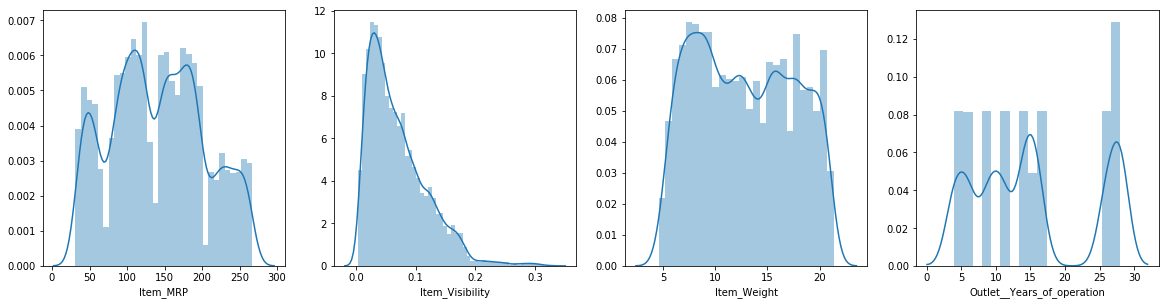

In [44]:
plt.figure(figsize=(20,16))
plt.subplot(3,4,1)
sns.distplot(df_bigmart['Item_MRP'])
plt.subplot(3,4,2)
sns.distplot(df_bigmart['Item_Visibility'])
plt.subplot(3,4,3)
sns.distplot(df_bigmart['Item_Weight'])
plt.subplot(3,4,4)
sns.distplot(df_bigmart['Outlet__Years_of_operation'])


In [45]:
#Lets treat the skewness
import numpy as np
df_bigmart.skew()
for col in df_bigmart.skew().index:
    if col in cols_to_be_checked:
        if df_bigmart.skew().loc[col]>0.5:
            df_bigmart[col]=np.sqrt(df_bigmart[col])
        if df_bigmart.skew().loc[col]<-0.5:
            df_bigmart[col]=np.cbrt(df_bigmart[col])

In [46]:
#Lets again chcek the skewness
for col in df_bigmart.skew().index:
    if col in cols_to_be_checked:
        print("Skewness of column {} is: {}".format(col,df_bigmart.skew().loc[col]))

Skewness of column Item_Weight is: 0.10041690891741958
Skewness of column Item_Visibility is: 0.41413332304805806
Skewness of column Item_MRP is: 0.13072836040225863
Skewness of column Outlet__Years_of_operation is: 0.3964651900863859


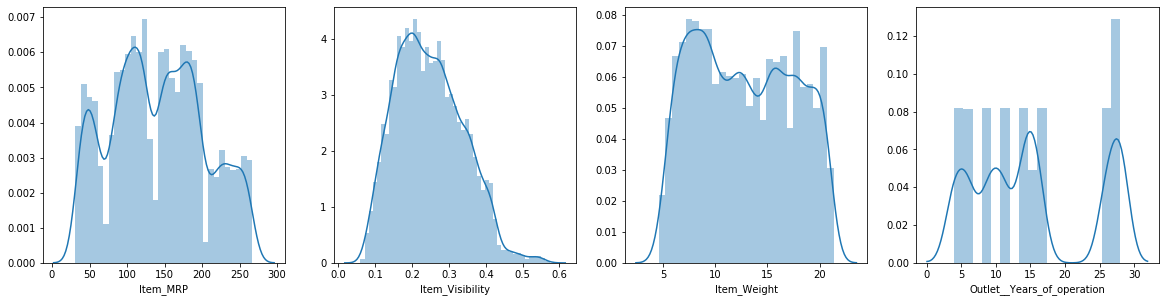

In [47]:
plt.figure(figsize=(20,16))
plt.subplot(3,4,1)
sns.distplot(df_bigmart['Item_MRP'])
plt.subplot(3,4,2)
sns.distplot(df_bigmart['Item_Visibility'])
plt.subplot(3,4,3)
sns.distplot(df_bigmart['Item_Weight'])
plt.subplot(3,4,4)
sns.distplot(df_bigmart['Outlet__Years_of_operation'])

In [48]:
#lets drop ["Item_Identifier","Outlet_Identifier","source"]
df_bigmart.drop(columns=["Item_Identifier","Outlet_Identifier"],inplace=True)

In [49]:
#Lets seprate the train and test
df_train=df_bigmart.loc[df_bigmart["source"]=="train"]
df_test=df_bigmart.loc[df_bigmart["source"]=="test"]
df_test.reset_index(drop=True,inplace=True)
print(df_train.columns)
print(df_test.columns)

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Item_Outlet_Sales',
       'source', 'Item_Fat_Content_Low Fat', 'Item_Fat_Content_Regular',
       'Item_Type_Baking Goods', 'Item_Type_Breads', 'Item_Type_Breakfast',
       'Item_Type_Canned', 'Item_Type_Dairy', 'Item_Type_Frozen Foods',
       'Item_Type_Fruits and Vegetables', 'Item_Type_Hard Drinks',
       'Item_Type_Health and Hygiene', 'Item_Type_Household', 'Item_Type_Meat',
       'Item_Type_Others', 'Item_Type_Seafood', 'Item_Type_Snack Foods',
       'Item_Type_Soft Drinks', 'Item_Type_Starchy Foods',
       'Outlet_Location_Type_Tier 1', 'Outlet_Location_Type_Tier 2',
       'Outlet_Location_Type_Tier 3', 'Outlet_Size_High', 'Outlet_Size_Medium',
       'Outlet_Size_Small', 'Outlet_Size_nan', 'Outlet_Type_Grocery Store',
       'Outlet_Type_Supermarket Type1', 'Outlet_Type_Supermarket Type2',
       'Outlet_Type_Supermarket Type3', 'Outlet__Years_of_operation'],
      dtype='object')
Index(['Item_Weight', 'Item_Visibil

In [50]:
#lets drop source column from df_train and df_test
df_train.drop(columns=["source"],inplace=True)
df_test.drop(columns=["source"],inplace=True)

C:\Users\pc\anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [51]:
#Lets drop the Item_Outlet_Sales from test dataset as that is the o/p variable that needs to be predicted
df_test.drop(columns=["Item_Outlet_Sales"],inplace=True)

In [52]:
#seprating input and output from df_train
df_x=df_train.drop(columns=["Item_Outlet_Sales"])
y=df_train[["Item_Outlet_Sales"]]

In [53]:
#Lets bring every column to common scale
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(df_x)
x=pd.DataFrame(x,columns=df_x.columns)

In [54]:
#to find random stat which gives maximum r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
def maxr2_score(regr,df_x,y):
    max_r_score=0
    for r_state in range(42,100):
        x_train, x_test, y_train, y_test = train_test_split(df_x, y,random_state = r_state,test_size=0.20)
        regr.fit(x_train,y_train)
        y_pred = regr.predict(x_test)
        r2_scr=r2_score(y_test,y_pred)
        print("r2 score corresponding to ",r_state," is ",r2_scr)
        if r2_scr>max_r_score:
            max_r_score=r2_scr
            final_r_state=r_state
    print("max r2 score corresponding to ",final_r_state," is ",max_r_score)
    return final_r_state

In [55]:
#lets make a function which evaluates the model using cross_val_score
from sklearn.model_selection import cross_val_score
def model_evaluation(model,x,y):
    c_scores=cross_val_score(model,x,y,cv=5,scoring="r2")
    print("Mean r2 score for regressor: ",c_scores.mean())
    print("standard deviation in r2 score for regressor: ",c_scores.std())
    print(c_scores)

In [75]:
#Lets use pca to reduce the dimensionality
from sklearn.decomposition import PCA
pca = PCA(n_components=23)
x_pca=pca.fit_transform(x)
print("vraiance :{}".format(np.sum(pca.explained_variance_ratio_)))

vraiance :0.9529690364338896


In [76]:
#Lets use decision tree
from sklearn.tree import DecisionTreeRegressor
import numpy as np
dtr=DecisionTreeRegressor()
r_state=maxr2_score(dtr,x_pca,y)

r2 score corresponding to  42  is  0.17040021497460456
r2 score corresponding to  43  is  0.21036166441592574
r2 score corresponding to  44  is  0.18300900119326802
r2 score corresponding to  45  is  0.15589576210506773
r2 score corresponding to  46  is  0.0903472767734238
r2 score corresponding to  47  is  0.11543608819697548
r2 score corresponding to  48  is  0.20553095930590615
r2 score corresponding to  49  is  0.17927390769599683
r2 score corresponding to  50  is  0.161798028280834
r2 score corresponding to  51  is  0.11974480422581979
r2 score corresponding to  52  is  0.11205378812404876
r2 score corresponding to  53  is  0.062299304644053755
r2 score corresponding to  54  is  0.19698871378759408
r2 score corresponding to  55  is  0.19705268149596566
r2 score corresponding to  56  is  0.16138872432670803
r2 score corresponding to  57  is  0.21310224677000356
r2 score corresponding to  58  is  0.14271892452674229
r2 score corresponding to  59  is  0.1437432907746926
r2 score corr

In [77]:
#lets use random forest regressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")
rfr=RandomForestRegressor()
parameters = {"n_estimators":[10,100,500]}
clf = GridSearchCV(rfr, parameters, cv=5,scoring="r2")
clf.fit(x_pca,y)
clf.best_params_

{'n_estimators': 500}

In [78]:
rfr=RandomForestRegressor(n_estimators=500)
r_state=maxr2_score(rfr,x_pca,y)

r2 score corresponding to  42  is  0.5521220485862742
r2 score corresponding to  43  is  0.5638535912311955
r2 score corresponding to  44  is  0.5490598702868948
r2 score corresponding to  45  is  0.5550113790826339
r2 score corresponding to  46  is  0.4893020593270254
r2 score corresponding to  47  is  0.5375772900542286
r2 score corresponding to  48  is  0.5553481035883628
r2 score corresponding to  49  is  0.5548631903876563
r2 score corresponding to  50  is  0.5430049246564819
r2 score corresponding to  51  is  0.5451391022560512
r2 score corresponding to  52  is  0.5323424224420064
r2 score corresponding to  53  is  0.515303268227385
r2 score corresponding to  54  is  0.5632019284111385
r2 score corresponding to  55  is  0.5601811427694923
r2 score corresponding to  56  is  0.5281489833187072
r2 score corresponding to  57  is  0.5571450361549166
r2 score corresponding to  58  is  0.5522456250227499
r2 score corresponding to  59  is  0.5447327442817982
r2 score corresponding to  60

In [79]:
#lets check KNN 
from sklearn.neighbors import KNeighborsRegressor
knr=KNeighborsRegressor()
parameters = {"n_neighbors":range(2,30)}
clf = GridSearchCV(knr, parameters, cv=5,scoring="r2")
clf.fit(x_pca, y)
clf.best_params_

{'n_neighbors': 7}

In [80]:
knr=KNeighborsRegressor(n_neighbors=7)
r_state=maxr2_score(knr,x_pca,y)

r2 score corresponding to  42  is  0.488366724643446
r2 score corresponding to  43  is  0.5125261661710524
r2 score corresponding to  44  is  0.5023134737248854
r2 score corresponding to  45  is  0.4904016342058868
r2 score corresponding to  46  is  0.4491197281346073
r2 score corresponding to  47  is  0.46286828072872854
r2 score corresponding to  48  is  0.5006623772583809
r2 score corresponding to  49  is  0.5083872726747363
r2 score corresponding to  50  is  0.4857416394490558
r2 score corresponding to  51  is  0.4794398386253331
r2 score corresponding to  52  is  0.48717021538801075
r2 score corresponding to  53  is  0.4605424035378345
r2 score corresponding to  54  is  0.5011525361356541
r2 score corresponding to  55  is  0.4971492867962001
r2 score corresponding to  56  is  0.4684157001030207
r2 score corresponding to  57  is  0.47555240461290216
r2 score corresponding to  58  is  0.4859020354270879
r2 score corresponding to  59  is  0.4825404430520974
r2 score corresponding to 

In [81]:
#Lets use SVM regressor
from sklearn.svm import SVR
import warnings
warnings.filterwarnings("ignore")
svr=SVR()
parameters={"kernel":["linear", "poly", "rbf"],"C":[0.001,0.01,0.1,1,10]}
clf = GridSearchCV(svr, parameters, cv=5,scoring="r2")
clf.fit(x_pca,y)
clf.best_params_

{'C': 10, 'kernel': 'linear'}

In [82]:
svr=SVR(kernel="linear",C=10)
r_state=maxr2_score(svr,x_pca,y)

r2 score corresponding to  42  is  0.5444069542936913
r2 score corresponding to  43  is  0.5342777248796553
r2 score corresponding to  44  is  0.5425594080971821
r2 score corresponding to  45  is  0.531692536163124
r2 score corresponding to  46  is  0.5247118351405987
r2 score corresponding to  47  is  0.5234879948369816
r2 score corresponding to  48  is  0.5201744501906975
r2 score corresponding to  49  is  0.5290788931920591
r2 score corresponding to  50  is  0.5282477811804198
r2 score corresponding to  51  is  0.5173856724987675
r2 score corresponding to  52  is  0.5384182195479368
r2 score corresponding to  53  is  0.5260389311766347
r2 score corresponding to  54  is  0.5364229621950665
r2 score corresponding to  55  is  0.5179897364761679
r2 score corresponding to  56  is  0.5079479777798159
r2 score corresponding to  57  is  0.518713242399747
r2 score corresponding to  58  is  0.5365507020604812
r2 score corresponding to  59  is  0.5291987818090205
r2 score corresponding to  60 

In [83]:
print("DECISION TREE REGRESSOR\n\n")
model_evaluation(dtr,x_pca,y)

DECISION TREE REGRESSOR


Mean r2 score for regressor:  0.16821170246489886
standard deviation in r2 score for regressor:  0.04473433870365466
[0.19664971 0.13895749 0.09391742 0.20641588 0.20511802]


In [84]:
print("RANDOM FOREST REGRESSOR\n\n")
model_evaluation(rfr,x_pca,y)

RANDOM FOREST REGRESSOR


Mean r2 score for regressor:  0.5452264690541119
standard deviation in r2 score for regressor:  0.025789264719575326
[0.56376419 0.51612042 0.51287023 0.55756634 0.57581115]


In [85]:
print("KNN REGRESSOR\n\n")
model_evaluation(knr,x_pca,y)

KNN REGRESSOR


Mean r2 score for regressor:  0.4864074393525528
standard deviation in r2 score for regressor:  0.021027936472594315
[0.49704915 0.45581778 0.47931037 0.48061916 0.51924073]


In [86]:
print("SVM REGRESSOR\n\n")
model_evaluation(svr,x_pca,y)

SVM REGRESSOR


Mean r2 score for regressor:  0.5293882047133197
standard deviation in r2 score for regressor:  0.004827548178852729
[0.53304263 0.52619493 0.52610366 0.53705291 0.52454689]


In [87]:
#Based on above r2 scores random forest and SVM are performing better than other two
#lets make model using SVM
x_train, x_test, y_train, y_test = train_test_split(x_pca, y,random_state = 76,test_size=0.20)
svr.fit(x_train,y_train)
y_pred = svr.predict(x_test)

In [88]:
#Lets find the rmse and r2_score using sklearn.metrics for SVM model
import numpy as np
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print("RMSE is: ",np.sqrt(mean_squared_error(y_test,y_pred)))
print("r2_score is: ",r2_score(y_test,y_pred))

RMSE is:  1136.1297013106075
r2_score is:  0.5485887674251892


In [89]:
#Lets use random forest also
x_train, x_test, y_train, y_test = train_test_split(x_pca, y,random_state = 89,test_size=0.20)
rfr.fit(x_train,y_train)
y_pred = rfr.predict(x_test)

In [90]:
#Lets find the rmse and r2_score using sklearn.metrics for random forest model
print("RMSE is: ",np.sqrt(mean_squared_error(y_test,y_pred)))
print("r2_score is: ",r2_score(y_test,y_pred))

RMSE is:  1091.558992752678
r2_score is:  0.5805127978796988


In [93]:
#lets transform df_test accoring to pca
x_pca_test=pca.transform(df_test)

In [95]:
sales_pred=rfr.predict(x_pca_test)

In [96]:
#lets make the dataframe for price_pred
sales_pred=pd.DataFrame(sales_pred,columns=["Item_Outlet_sales"])

In [97]:
#Lets save the submission to csv
sales_pred.to_csv("Item_outlet_sales_Predictions.csv",index=False)

In [98]:
import pickle
filename='bigmart.pkl'
pickle.dump(rfr,open(filename,'wb'))